In [2]:
import numpy as np
from scipy.stats import gamma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use("ggplot")

$Gamma(\theta|k, \lambda) \propto \theta^{k-1}\exp(-\lambda \theta)$

In [4]:
eps = 1e-2
lam = 1
k = 11
NMCS = 10000

$H = \frac{1}{2}p^2 - (k-1)\log\theta + \lambda \theta$

$\frac{d\theta}{dt} = p$  
  
$\frac{dp}{dt} = (k-1)\frac{1}{\theta} - \lambda$

In [5]:
f = lambda x, lam, k : (k-1) / x - lam

/Users/yocchan/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


<a list of 4 text.Text objects>

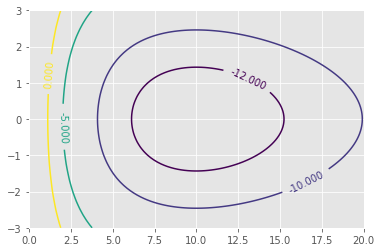

In [7]:
x, y = np.linspace(0, 20, 100), np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
cs = plt.contour(X, Y, 0.5 * Y **2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(cs, inline=1, fontsize = 10)

# Euler method

In [8]:
def euler(q, p, eps, lam, k, f):
    q_new = q + eps * p
    p_new = p + eps * f(q, lam, k)
    q, p = q_new, p_new
    return q, p

In [9]:
q, p = 4.0, 0.0
euler_arr = np.zeros([NMCS, 2])
euler_arr[0, 0] = q
euler_arr[0, 1] = p
for i in range(1, NMCS):
    q, p = euler(q, p, eps, lam, k, f)
    euler_arr[i, 0], euler_arr[i, 1] = q, p
    
df_euler = pd.DataFrame(euler_arr, columns=["q", "p"])

In [10]:
df_euler.head()

,q,p
0,4.00000,0.000000
1,4.00000,0.015000
2,4.00015,0.030000
3,4.00045,0.044999
4,4.00090,0.059996


/Users/yocchan/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<a list of 4 text.Text objects>

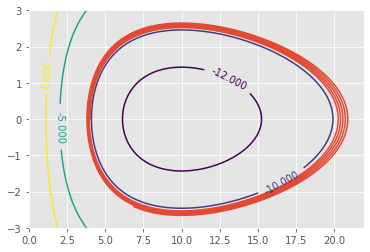

In [12]:
plt.plot(df_euler["q"], df_euler["p"])
cs = plt.contour(X, Y, 0.5 * Y **2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(cs, inline=1, fontsize = 10)

# Leap-flog method

In [13]:
def leap_flog(q, p, eps, lam, k, f):
    p_new = p + 0.5 * eps * f(q, lam, k)
    q_new = q + eps * p_new
    p_new = p_new + 0.5 * eps * f(q_new, lam, k)
    q, p = q_new, p_new
    return q, p

In [14]:
q, p = 4.0, 0.0
lf_arr = np.zeros([NMCS, 2])
lf_arr[0, 0] = q
lf_arr[0, 1] = p
for i in range(1, NMCS):
    q, p = leap_flog(q, p, eps, lam, k, f)
    lf_arr[i, 0], lf_arr[i, 1] = q, p
    
df_lf = pd.DataFrame(lf_arr, columns=["q", "p"])

/Users/yocchan/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<a list of 4 text.Text objects>

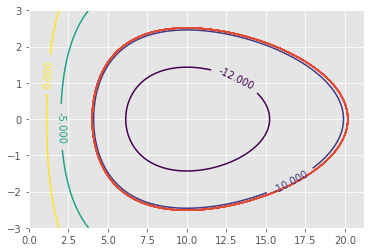

In [15]:
plt.plot(df_lf["q"], df_lf["p"])
cs = plt.contour(X, Y, 0.5 * Y **2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(cs, inline=1, fontsize = 10)